Importing Libraries

In [1]:
import tensorflow as tf # used for train & execute Neural network image recognition
import matplotlib.pyplot as plt # creating static, interactive, and animated visualizations
import pandas as pd #used for working with data sets
import seaborn as sns #data visualization library based on matplotlib

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'Riceleafdisease3/train', # data location
    labels="inferred", #labels are generated from the directory structure
    label_mode="categorical",#labels are encoded as a categorical vector
    class_names=None,
    color_mode="rgb",#3 channels in the image tensors
    batch_size=32,
    image_size=(128, 128),# heidht,width
    shuffle=True, #sorts the data in random order & fast
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,


)

Found 14022 files belonging to 9 classes.


## Validation image preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'Riceleafdisease3/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    

)

Found 14022 files belonging to 9 classes.


In [4]:
training_set # to see train data set format

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set: # train data set format in more details
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  ...

  [[255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   ...
   [255.       255.       255.      ]
   [255.       255.       255.      ]
   [255.       255.       255.      ]]

  [[255.       255.       255.    

## Building Model

In [38]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout # connected NN layer,2D convolution layer,Max pooling operation for 2D spatial data,Flattens the input. Does not affect the batch size,Applies dropout to the input
from tensorflow.keras.models import Sequential # the model is purely a stack of single-input, single-output layers 

In [39]:
model = Sequential()

### Building Convolution Layer

In [40]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape= [128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [41]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [42]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [43]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [44]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [45]:
model.add(Dropout(0.25)) # whatever layers we getting drop 25% of them

In [46]:
model.add(Flatten())

In [47]:
model.add(Dense(units=1600,activation='relu')) #hidden layer & increase number of nuron to avoid underfiting

In [48]:
model.add(Dropout(0.4)) # to avoid overfiting

#### Output Layer

In [49]:
model.add(Dense(units=9,activation='softmax'))

### Compiling Model

In [50]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']) # choose small learning rate to avoid overshooting

In [51]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1600)                │       3,278,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │          14,409 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,005,033 (30.54 MB)

 Trainable params: 8,005,033 (30.54 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [52]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10) #train model using validation set & record tarin history 

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 720s 2s/step - accuracy: 0.4087 - loss: 1.6676 - val_accuracy: 0.7315 - val_loss: 0.7643
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 728s 2s/step - accuracy: 0.7323 - loss: 0.7452 - val_accuracy: 0.7969 - val_loss: 0.5653
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 694s 2s/step - accuracy: 0.7931 - loss: 0.5822 - val_accuracy: 0.8358 - val_loss: 0.4656
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 733s 2s/step - accuracy: 0.8438 - loss: 0.4366 - val_accuracy: 0.9024 - val_loss: 0.2757
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 792s 2s/step - accuracy: 0.8893 - loss: 0.3250 - val_accuracy: 0.9171 - val_loss: 0.2332
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 751s 2s/step - accuracy: 0.9120 - loss: 0.2648 - val_accuracy: 0.9309 - val_loss: 0.1953
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 725s 2s/step - accuracy: 0.9319 - loss: 0.1969 - val_accuracy: 0.9473 - val_loss: 0.1554
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.9399 - loss: 0.1741 - val_accu

## Model Evaluation 
### Model Evaluation on Training set

In [53]:
train_loss,train_acc = model.evaluate(training_set)

439/439 ━━━━━━━━━━━━━━━━━━━━ 227s 505ms/step - accuracy: 0.9804 - loss: 0.0603


In [54]:
val_loss,val_acc = model.evaluate(validation_set) # model evalution on validation set

439/439 ━━━━━━━━━━━━━━━━━━━━ 207s 465ms/step - accuracy: 0.9811 - loss: 0.0574


### Saving model

In [55]:
model.save("trained_model.keras")

In [56]:
training_history.history # total train history

{'accuracy': [0.5559121370315552,
  0.7488945722579956,
  0.8122236728668213,
  0.8498787879943848,
  0.8936671018600464,
  0.9164883494377136,
  0.9320353865623474,
  0.9462986588478088,
  0.9481528997421265,
  0.9686920642852783],
 'loss': [1.2394273281097412,
  0.6936220526695251,
  0.5232198238372803,
  0.4199483394622803,
  0.31004971265792847,
  0.23857198655605316,
  0.19629254937171936,
  0.15916036069393158,
  0.15315237641334534,
  0.09085280448198318],
 'val_accuracy': [0.731493353843689,
  0.7968906164169312,
  0.8357580900192261,
  0.9023677110671997,
  0.9171302318572998,
  0.9308943152427673,
  0.9472970962524414,
  0.9549279808998108,
  0.9693338871002197,
  0.9818142652511597],
 'val_loss': [0.7642694115638733,
  0.5652647614479065,
  0.4656020402908325,
  0.2756931781768799,
  0.23320935666561127,
  0.19525356590747833,
  0.1554459184408188,
  0.13187730312347412,
  0.09061317890882492,
  0.05686681345105171]}

### Record history

In [57]:
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

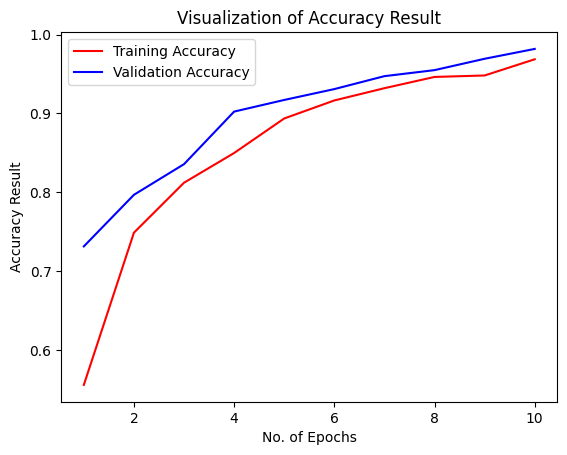

In [58]:
epochs =[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### some other metrics for model eveluation

In [59]:
class_name= validation_set.class_names
class_name # record class name

['bacterial_leaf_blight',
 'brown_spot',
 'healthy',
 'leaf_blast',
 'leaf_scald',
 'narrow_brown_spot',
 'rice_hispa',
 'sheath_blight',
 'tungro']

In [61]:
test_set= tf.keras.utils.image_dataset_from_directory(
    'Riceleafdisease3/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 14022 files belonging to 9 classes.


In [62]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

439/439 ━━━━━━━━━━━━━━━━━━━━ 189s 429ms/step


(array([[9.99997497e-01, 3.52380482e-07, 2.47304342e-07, ...,
         6.53568311e-11, 2.94371229e-11, 2.93973135e-09],
        [1.00000000e+00, 7.59723950e-10, 6.56413326e-11, ...,
         1.06410426e-16, 1.19442159e-15, 2.03834508e-13],
        [1.00000000e+00, 8.72336261e-14, 4.96061569e-12, ...,
         2.27138526e-13, 1.35564218e-08, 1.86062572e-11],
        ...,
        [1.46383050e-09, 4.16441964e-10, 1.36948175e-10, ...,
         5.24934523e-12, 5.73057646e-09, 9.99999642e-01],
        [4.29324531e-09, 5.03392926e-07, 8.48772231e-07, ...,
         1.92232108e-07, 2.64680877e-09, 9.99997258e-01],
        [1.63871974e-08, 2.58244359e-06, 1.37203224e-05, ...,
         5.60783242e-09, 4.93381947e-07, 9.99982834e-01]], dtype=float32),
 (14022, 9))

In [63]:
predicted_categories=tf.argmax(y_pred,axis=1)

In [64]:
predicted_categories

<tf.Tensor: shape=(14022,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [65]:
true_categories =tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(14022, 9), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [66]:
Y_true=tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(14022,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8], dtype=int64)>

In [67]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                       precision    recall  f1-score   support

bacterial_leaf_blight       1.00      1.00      1.00      1386
           brown_spot       0.93      1.00      0.96      1480
              healthy       1.00      0.95      0.97      1490
           leaf_blast       0.98      0.95      0.96      1801
           leaf_scald       0.99      1.00      0.99      1670
    narrow_brown_spot       0.99      0.96      0.97      1416
           rice_hispa       0.98      1.00      0.99      1461
        sheath_blight       0.99      0.99      0.99      1578
               tungro       0.98      1.00      0.99      1740

             accuracy                           0.98     14022
            macro avg       0.98      0.98      0.98     14022
         weighted avg       0.98      0.98      0.98     14022



### Confusion Matrix Visualization

In [70]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[1383,    2,    0,    0,    0,    0,    0,    0,    1],
       [   0, 1474,    1,    5,    0,    0,    0,    0,    0],
       [   1,   17, 1418,   16,    0,    0,   28,    0,   10],
       [   0,   65,    6, 1704,    2,   10,    2,    6,    6],
       [   0,    0,    0,    0, 1667,    2,    0,    1,    0],
       [   3,   23,    0,   11,   14, 1357,    0,    4,    4],
       [   0,    0,    0,    1,    0,    0, 1457,    0,    3],
       [   0,    0,    0,    2,    2,    1,    0, 1567,    6],
       [   0,    0,    0,    0,    0,    0,    0,    0, 1740]],
      dtype=int64)

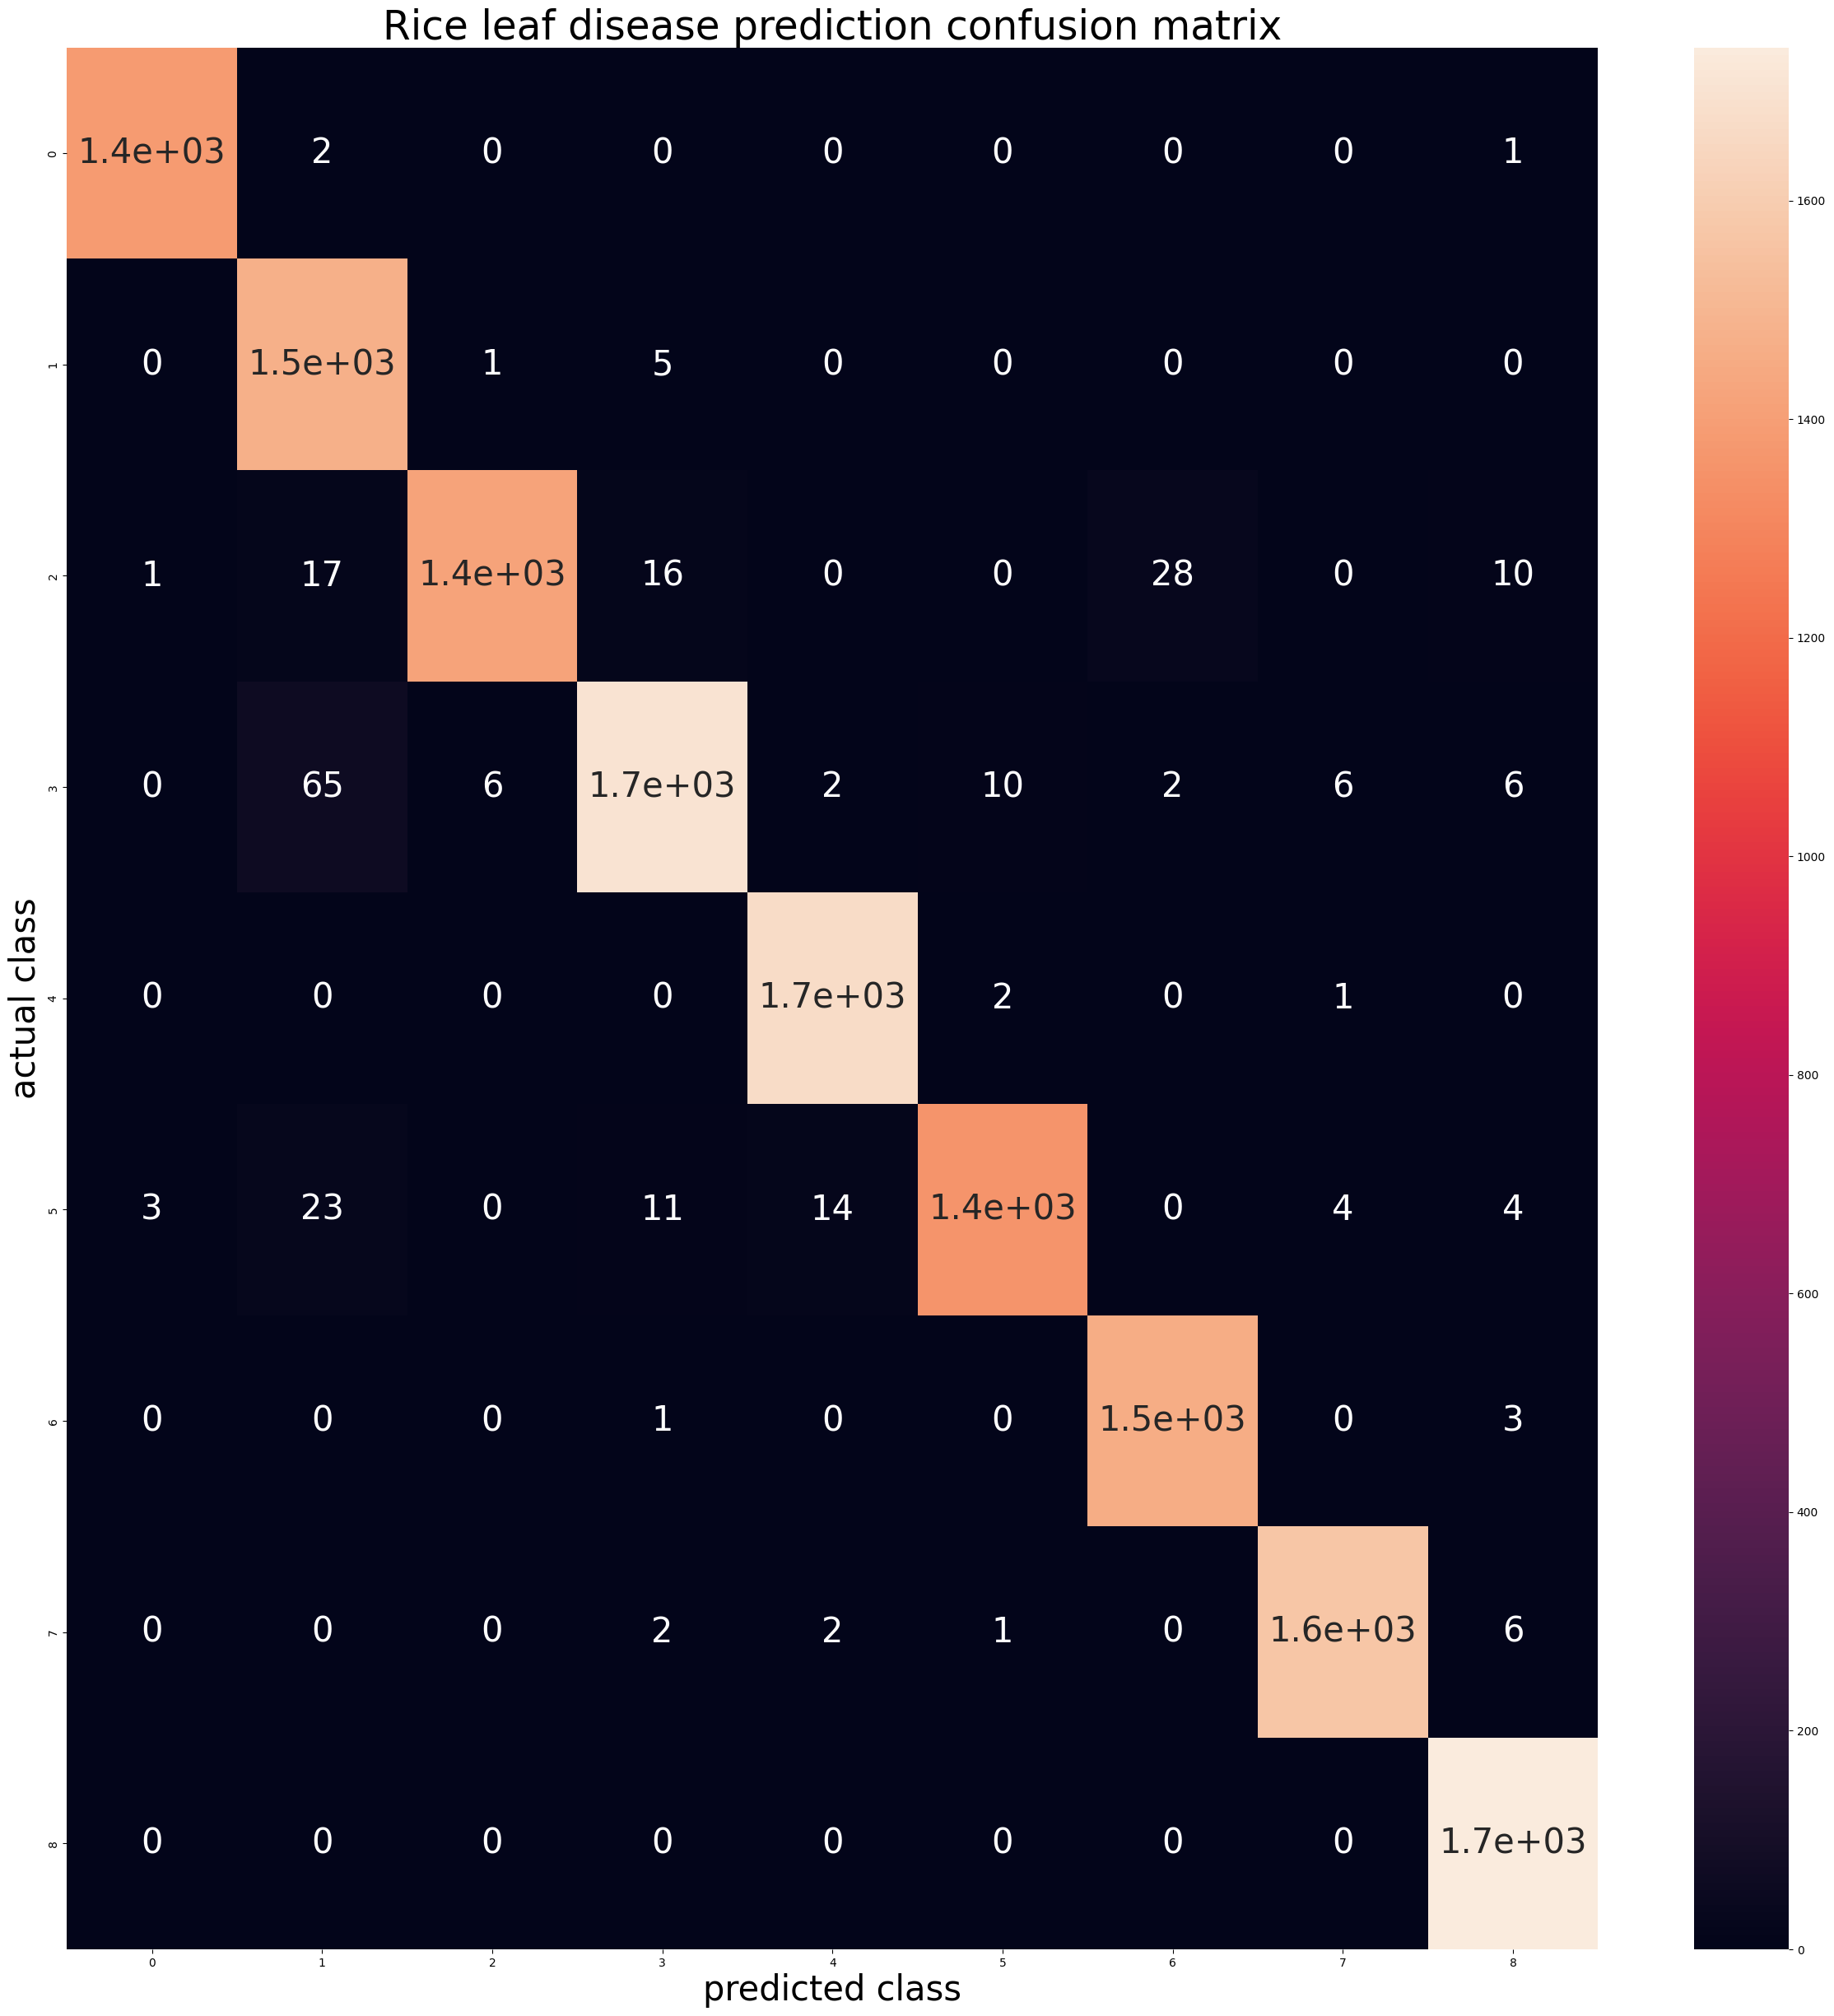

In [71]:
plt.figure(figsize=(30,30))
sns.heatmap(cm,annot=True,annot_kws={'size':30})
plt.xlabel("predicted class",fontsize=30)
plt.ylabel("actual class",fontsize=30)
plt.title("Rice leaf disease prediction confusion matrix",fontsize=35)
plt.show()